Create two random data sets with two features and two classes

Dependencies

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Consider that you are given a car height and you have the class label as 1 if cost of car is greater than 550 and 0 if it is less than or equal to 550.

In [297]:
data = pd.read_csv('Data.csv').to_numpy()

# Create the labels from the data

In [298]:
label = [] #labels -> 0,1
x_c1 = [] #x_c1 -> stores the heights of the cars labelled as 1
x_c2 = [] #x_c2 -> stores the heights of the cars labelled as 0
c1_count = 0
c2_count = 0
for i in range(data.shape[0]):
  if(data[i][1] > 550):
    label.append(1)
    x_c1.append(data[i][0])
    c1_count += 1
  else:
    label.append(0)
    x_c2.append(data[i][0])
    c2_count += 1

# Plotting the distribution of samples.

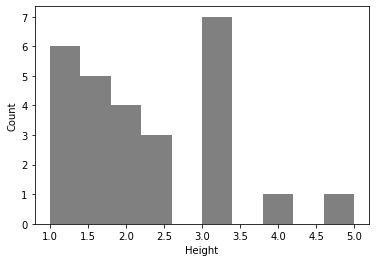

In [299]:
#plotting the histogram for the feature - 'Height'
import seaborn as sns
x = data[:,0]

plt.hist(x, color='grey')
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

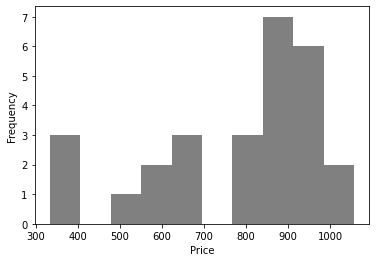

In [300]:
#plotting the histogram for the feature - 'Price'
price = data[:,1]

plt.hist(price, color='grey')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Prior Probabilities for both the classes

In [301]:
no_of_samples = len(data)
#probability that the car is labelled as 1
prob_c1 = c1_count/no_of_samples
#probability that the car is labelled as 0
prob_c2 = c2_count/no_of_samples
print("Prior Class 1:",prob_c1)
print("Prior Class 2:",prob_c2)

Prior Class 1: 0.8518518518518519
Prior Class 2: 0.14814814814814814


# Unique Values

In [302]:
from collections import Counter
unique_c1 = Counter(x_c1).keys() 
count_unique_c1 = list(Counter(x_c1).values()) 
unique_c2 = Counter(x_c2).keys() 
count_unique_c2 = list(Counter(x_c2).values()) 

Plot the count of each unique element of the feature

In [303]:
#'Height' for the cars labelled as 1
print(unique_c1)
print(count_unique_c1)

dict_keys([3.0, 4.0, 2.0, 1.0, 1.5, 2.5])
[6, 1, 4, 5, 5, 2]


In [304]:
#'Height' for the cars labelled as 0
print(unique_c2)
print(count_unique_c2)

dict_keys([1.0, 5.0, 3.0, 2.5])
[1, 1, 1, 1]


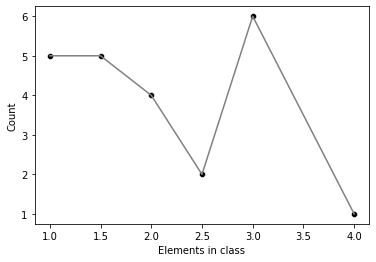

In [305]:
#plot for count of each unique element of the feature(Height)
sns.lineplot(list(unique_c1),count_unique_c1, color='grey')
sns.scatterplot(list(unique_c1),count_unique_c1, color='black')
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

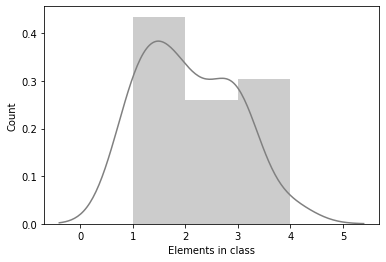

In [306]:
#Probability distribution of x_c1
sns.distplot(x_c1, color='grey')
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

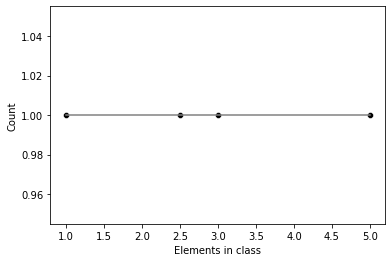

In [307]:
#Plot for the unique values in class c2 (Price)
sns.lineplot(list(unique_c2),count_unique_c2, color='grey')
sns.scatterplot(list(unique_c2),count_unique_c2, color='black')
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

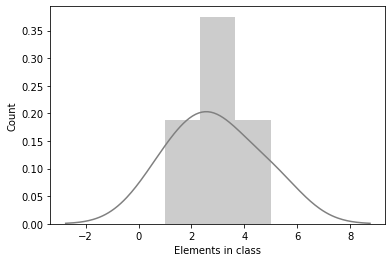

In [308]:
#Probability distribution of x_c2
sns.distplot(x_c2, color='grey')
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

# Likelihood

Plot P(x|C1) and P(x|C2)

In [309]:
#calculating the likelihoods for both the classes c1 and c2
x_c1_prob = {}
for i in Counter(x_c1).keys():
  x_c1_prob[i] = (Counter(x_c1)[i])/len(x_c1)

x_c2_prob = {}
for i in Counter(x_c2).keys():
  x_c2_prob[i] = (Counter(x_c2)[i])/len(x_c2)

x_c1_prob, x_c2_prob

({1.0: 0.21739130434782608,
  1.5: 0.21739130434782608,
  2.0: 0.17391304347826086,
  2.5: 0.08695652173913043,
  3.0: 0.2608695652173913,
  4.0: 0.043478260869565216},
 {1.0: 0.25, 2.5: 0.25, 3.0: 0.25, 5.0: 0.25})

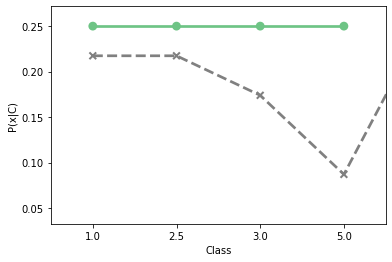

(array([0.26086957, 0.04347826, 0.17391304, 0.2173913 , 0.2173913 ,
        0.08695652]), array([0.25, 0.25, 0.25, 0.25]))

In [310]:
#plotting the likelihoods in a single graph for c1 and c2 classes
y1 = np.array(count_unique_c1)/len(x_c1)
sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'], color='grey')
y2 = np.array(count_unique_c2)/len(x_c2)
sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'], color='#6ec485')
plt.xlabel("Class")
plt.ylabel("P(x|C)")
plt.show()
y1,y2

# Posterior Probability

In [311]:
x_prob = {}
for i in (Counter(x).keys()):
  x_prob[i] = Counter(x)[i]/no_of_samples

x_prob

{1.0: 0.2222222222222222,
 1.5: 0.18518518518518517,
 2.0: 0.14814814814814814,
 2.5: 0.1111111111111111,
 3.0: 0.25925925925925924,
 4.0: 0.037037037037037035,
 5.0: 0.037037037037037035}

In [312]:
# P(A|B) = P(B|A) * P(A) / P(B)

posterior_c1 = {}
for i in (Counter(x).keys()):
  if i not in x_c1_prob.keys():
    posterior_c1[i]= 0
  else:
    posterior_c1[i] = (x_c1_prob[i] * prob_c1) / x_prob[i]

posterior_c2 = {}
for i in (Counter(x).keys()):
  if i not in x_c2_prob.keys():
    posterior_c2[i]= 0
  else:
    posterior_c2[i] = (x_c2_prob[i] * prob_c2) / x_prob[i]
    
posterior_c1,posterior_c2

({1.0: 0.8333333333333334,
  1.5: 1.0,
  2.0: 1.0,
  2.5: 0.6666666666666666,
  3.0: 0.8571428571428571,
  4.0: 1.0,
  5.0: 0},
 {1.0: 0.16666666666666666,
  1.5: 0,
  2.0: 0,
  2.5: 0.3333333333333333,
  3.0: 0.14285714285714285,
  4.0: 0,
  5.0: 1.0})

Plot P(C1|x) and P(C2|x)

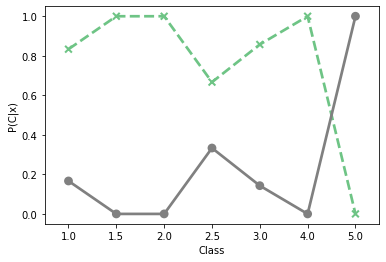

array([0.26086957, 0.04347826, 0.17391304, 0.2173913 , 0.2173913 ,
       0.08695652])

In [313]:
#Plotting the values for posterier probabilties for both the classes

sns.pointplot(list(posterior_c1.keys()), list(posterior_c1.values()), linestyles="--",markers =['x'], color='#6ec485')
sns.pointplot(list(posterior_c2.keys()),list(posterior_c2.values()), linestyles="-",markers =['o'], color = 'grey')
plt.xlabel("Class")
plt.ylabel("P(C|x)")
plt.show()
y1

# Dataset 2

Read dataset. c1 contains two features of class 1 and c2 contains the two features for class 2. 

In [314]:
class1_train1 = pd.read_csv('c1')
class2_train2 = pd.read_csv('c2')

ct3 = pd.concat([class1_train1,class2_train2])
ct3 = ct3.reset_index()

ct3['class']=pd.Series()
ct3['class'].iloc[:159]=1
ct3['class'].iloc[160:]=2

class1_train = class1_train1.to_numpy()
class2_train = class2_train2.to_numpy()

class1_train1["x1"] = pd.cut(class1_train1["x1"],right=False,bins=10,labels=[1,2,3,4,5,6,7,8,9,10])
class1_train1["x2"] = pd.cut(class1_train1["x2"],right=False,bins=10,labels=[1,2,3,4,5,6,7,8,9,10])
class2_train2["x1"] = pd.cut(class2_train2["x1"],right=False,bins=10,labels=[1,2,3,4,5,6,7,8,9,10])
class2_train2["x2"] = pd.cut(class2_train2["x2"],right=False,bins=10,labels=[1,2,3,4,5,6,7,8,9,10])

ct4 = pd.concat([class1_train1,class2_train2])

ct4['class']=pd.Series()
ct4['class'].iloc[:159]=1
ct4['class'].iloc[160:]=2

class1_train1 = class1_train1.to_numpy()
class2_train2 = class2_train2.to_numpy()

ct4['class'].value_counts()

1.0    159
2.0     39
Name: class, dtype: int64

Print the data

In [315]:
print(class1_train.shape)
print(class1_train)
print(type(class2_train))
print(class2_train.shape)
print(type(class1_train))
print(class2_train)

(160, 2)
[[ 3.20478053e-01  4.81092097e-01]
 [ 5.06909985e-02  9.63995041e-02]
 [ 3.74846984e+00  4.03931041e-01]
 [ 2.25637447e+00  2.08996208e+00]
 [ 1.42145382e+00  1.24362901e+00]
 [ 4.08062705e-01  9.24810050e-01]
 [ 1.60681941e+00  4.75268430e-01]
 [ 1.57397678e+00  1.60394699e+00]
 [ 1.73121450e+00  2.43452464e+00]
 [ 9.30696141e-01  2.12345759e-01]
 [ 1.43750641e+00 -2.84913595e-01]
 [-4.91480512e-01  2.70506180e-01]
 [ 2.35052206e+00  2.34923853e+00]
 [ 1.06032568e+00  2.25909849e-01]
 [ 2.23321779e+00  1.18800751e+00]
 [-3.36602971e-01  8.26100949e-01]
 [ 1.21051794e+00  3.59324046e-01]
 [ 1.95878231e+00  2.81435856e+00]
 [ 5.35856323e-01 -1.54336636e-01]
 [ 2.89423945e+00  1.71311383e+00]
 [ 1.38569352e+00  1.74692600e+00]
 [ 1.27854113e+00 -3.70841388e-01]
 [-9.07354159e-02  2.42044784e+00]
 [ 9.07143282e-01  5.69730755e-01]
 [ 2.28848082e+00  1.68559588e+00]
 [-1.53479431e-01 -3.95808482e-01]
 [ 2.40208659e+00  4.41623125e-01]
 [ 1.21455553e+00  1.51675544e+00]
 [ 3.150590

# Plotting the distribution of samples.

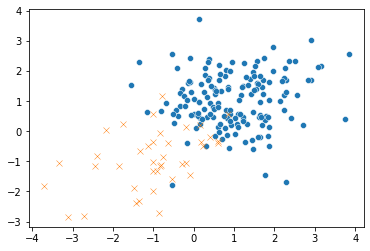

In [316]:
import seaborn as sns
sns.scatterplot(class1_train[:,0],class1_train[:,1],marker='o')
sns.scatterplot(class2_train[:,0],class2_train[:,1],marker='x')
plt.show()

Determine Prior Probabilities

In [317]:
no_of_samples = len(class1_train)+len(class2_train)

In [318]:
prob_c1 = len(class1_train)/no_of_samples
prob_c1

0.8040201005025126

In [319]:
prob_c2 = len(class2_train)/no_of_samples
prob_c2

0.19597989949748743

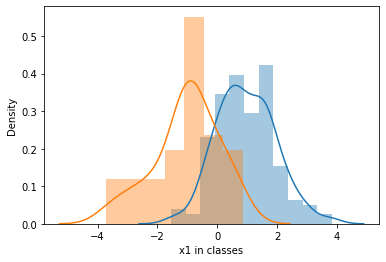

In [320]:
sns.distplot(class1_train[:,0])
sns.distplot(class2_train[:,0])
plt.xlabel("x1 in classes")
plt.show()

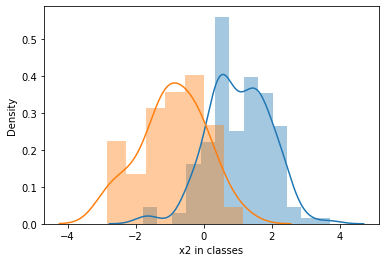

In [321]:
sns.distplot(class1_train[:,1])
sns.distplot(class2_train[:,1])
plt.xlabel("x2 in classes")
plt.show()

Plotting the prior

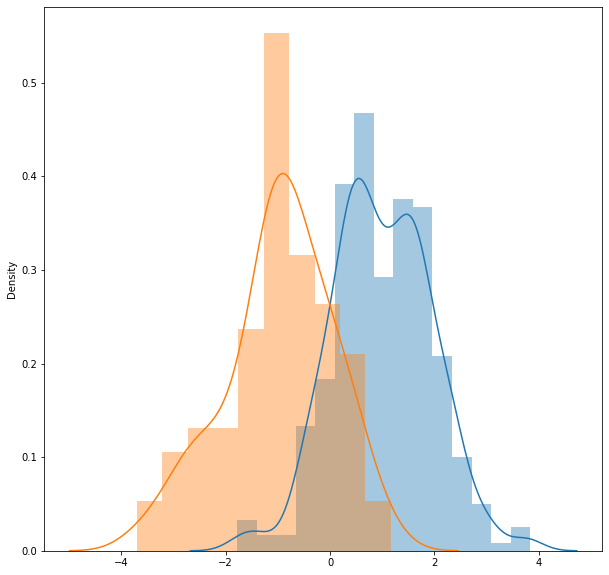

In [322]:
#Requires proper labelling
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(class1_train,label='C1')
sns.distplot(class2_train,label='C2')
plt.show()

Plot the data distribution and the histogram of feature 1 and feature 2 in the x axis and the y -axis respectively. The distribution of feature 1 wil be along the top of the x-axis and feature 2 along the right of the y axis.

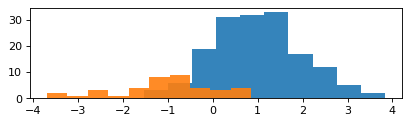

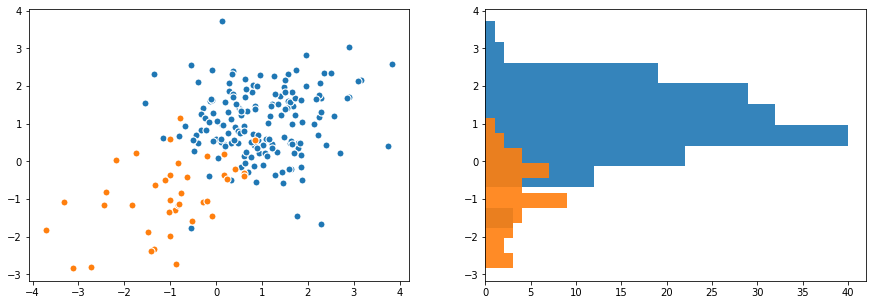

In [323]:
#plotting the distribution and the histogram

#changing the size of the histogram 
plt.figure(figsize=(6, 1.5), dpi=80)

#plotting histogram for feature 1
plt.hist(class1_train[:,0], alpha=0.9, label='x1')
plt.hist(class2_train[:,0], alpha=0.9, label='x2')

fig, axes = plt.subplots(1, 2, figsize=(15,5))

#plotting the distribution
sns.scatterplot(class1_train[:,0],class1_train[:,1],marker='.', ax=axes[0], s = 200)
sns.scatterplot(class2_train[:,0],class2_train[:,1],marker='.', ax=axes[0], s = 200)

#plotting histogram for feature 2
plt.hist(class1_train[:,1], alpha=0.9, label='x1', orientation='horizontal')
plt.hist(class2_train[:,1], alpha=0.9, label='x2', orientation='horizontal')

plt.show()

In [324]:
from collections import Counter
x1_c1 = class1_train1[:,0]
unique1_c1 = Counter(x1_c1).keys() 
count_unique1_c1 = list(Counter(x1_c1).values()) 
x1_c2 = class2_train2[:,0]
unique1_c2 = Counter(x1_c2).keys() 
count_unique1_c2 = list(Counter(x1_c2).values())
x2_c1 = class1_train1[:,1]
unique2_c1 = Counter(x2_c1).keys() 
count_unique2_c1 = list(Counter(x2_c1).values()) 
x2_c2 = class2_train2[:,1]
unique2_c2 = Counter(x2_c2).keys() 
count_unique2_c2 = list(Counter(x2_c2).values())

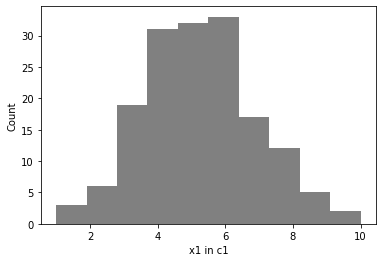

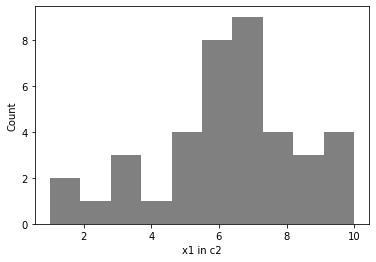

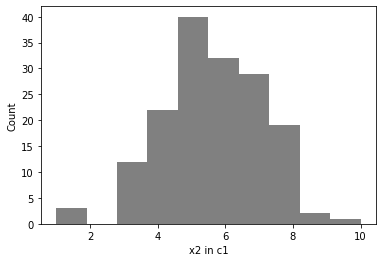

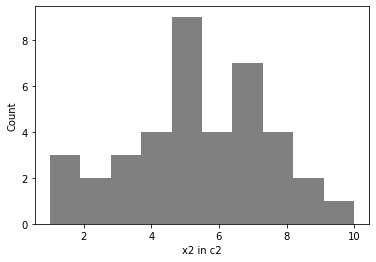

In [325]:
plt.hist(x1_c1, color = 'grey')
plt.xlabel("x1 in c1")
plt.ylabel("Count")
plt.show()
print("\n")
plt.hist(x1_c2, color = 'grey')
plt.xlabel("x1 in c2")
plt.ylabel("Count")
plt.show()
print("\n")
plt.hist(x2_c1, color = 'grey')
plt.xlabel("x2 in c1")
plt.ylabel("Count")
plt.show()
print("\n")
plt.hist(x2_c2, color = 'grey')
plt.xlabel("x2 in c2")
plt.ylabel("Count")
plt.show()

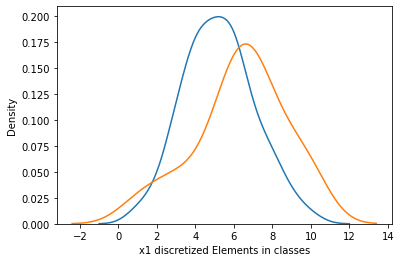

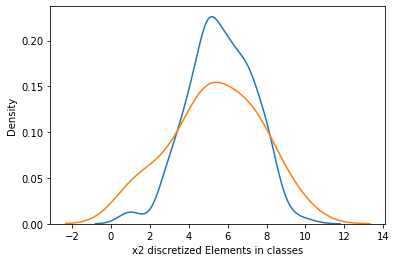

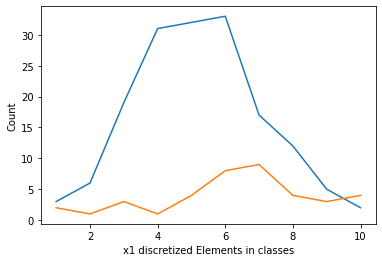

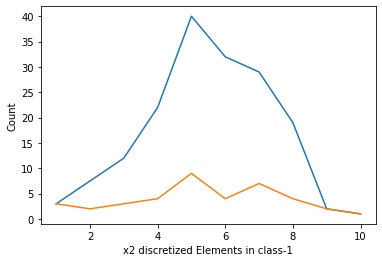

In [326]:
sns.distplot(x1_c1,hist=False)
sns.distplot(x1_c2,hist=False)
plt.xlabel("x1 discretized Elements in classes")
plt.show()
print('\n')
sns.distplot(x2_c1,hist=False)
sns.distplot(x2_c2,hist=False)
plt.xlabel("x2 discretized Elements in classes")
plt.show()
print('\n')
sns.lineplot(list(unique1_c1),count_unique1_c1)
sns.lineplot(list(unique1_c2),count_unique1_c2)
plt.xlabel("x1 discretized Elements in classes")
plt.ylabel("Count")
plt.show()
print('\n')
sns.lineplot(list(unique2_c1),count_unique2_c1)
sns.lineplot(list(unique2_c2),count_unique2_c2)
plt.xlabel("x2 discretized Elements in class-1")
plt.ylabel("Count")
plt.show()

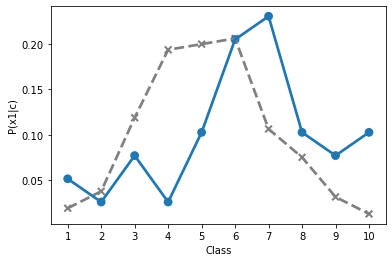

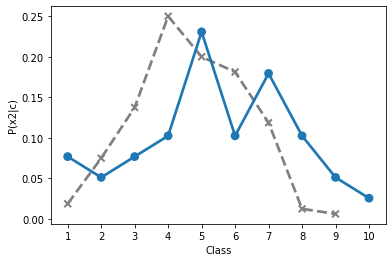

In [327]:
y11 = np.array(count_unique1_c1)/len(x1_c1)
sns.pointplot(list(unique1_c1),y11, linestyles="--",markers =['x'], color='grey' )
y12 = np.array(count_unique1_c2)/len(x1_c2)
sns.pointplot(list(unique1_c2),y12,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(x1|c)")
plt.show()
print('\n')
y21 = np.array(count_unique2_c1)/len(x2_c1)
sns.pointplot(list(unique2_c1),y21, linestyles="--",markers =['x'], color='grey' )
y22 = np.array(count_unique2_c2)/len(x2_c2)
sns.pointplot(list(unique2_c2),y22,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(x2|c)")
plt.show()

In [328]:
x1 = ct4['x1']
Counter(x1)
prob_x1 ={}
for i in (Counter(x1).keys()):
  prob_x1[i] = Counter(x1)[i]/no_of_samples

x2 =  ct4['x2']
Counter(x2)
prob_x2 ={}
for i in (Counter(x2).keys()):
  prob_x2[i] = Counter(x2)[i]/no_of_samples

prob_x1, prob_x2

({1: 0.02512562814070352,
  2: 0.035175879396984924,
  3: 0.11055276381909548,
  4: 0.16080402010050251,
  5: 0.18090452261306533,
  6: 0.20603015075376885,
  7: 0.1306532663316583,
  8: 0.08040201005025126,
  9: 0.04020100502512563,
  10: 0.03015075376884422},
 {1: 0.03015075376884422,
  2: 0.010050251256281407,
  3: 0.07537688442211055,
  4: 0.1306532663316583,
  5: 0.24623115577889448,
  6: 0.18090452261306533,
  7: 0.18090452261306533,
  8: 0.11557788944723618,
  9: 0.020100502512562814,
  10: 0.010050251256281407})

In [329]:
Counter(x1_c1)
prob_x1_c1 = {}
for i in Counter(x1_c1).keys():
  prob_x1_c1[i] = (Counter(x1_c1)[i])/len(x1_c1)



Counter(x1_c2)
prob_x1_c2 = {}
for i in Counter(x1_c2).keys():
  prob_x1_c2[i] = (Counter(x1_c2)[i])/len(x1_c2)



Counter(x2_c1)
prob_x2_c1 = {}
for i in Counter(x2_c1).keys():
  prob_x2_c1[i] = (Counter(x2_c1)[i])/len(x2_c1)



Counter(x2_c2)
prob_x2_c2 = {}
for i in Counter(x2_c2).keys():
  prob_x2_c2[i] = (Counter(x2_c2)[i])/len(x2_c2)

prob_x1_c1, prob_x1_c2,prob_x2_c1, prob_x2_c2

({1: 0.01875,
  2: 0.0375,
  3: 0.11875,
  4: 0.19375,
  5: 0.2,
  6: 0.20625,
  7: 0.10625,
  8: 0.075,
  9: 0.03125,
  10: 0.0125},
 {1: 0.05128205128205128,
  2: 0.02564102564102564,
  3: 0.07692307692307693,
  4: 0.02564102564102564,
  5: 0.10256410256410256,
  6: 0.20512820512820512,
  7: 0.23076923076923078,
  8: 0.10256410256410256,
  9: 0.07692307692307693,
  10: 0.10256410256410256},
 {1: 0.01875,
  3: 0.075,
  4: 0.1375,
  5: 0.25,
  6: 0.2,
  7: 0.18125,
  8: 0.11875,
  9: 0.0125,
  10: 0.00625},
 {1: 0.07692307692307693,
  2: 0.05128205128205128,
  3: 0.07692307692307693,
  4: 0.10256410256410256,
  5: 0.23076923076923078,
  6: 0.10256410256410256,
  7: 0.1794871794871795,
  8: 0.10256410256410256,
  9: 0.05128205128205128,
  10: 0.02564102564102564})

# Plot the Posterior Probability for each class

In [330]:
posterior_c1_x1 ={}
for i in (Counter(x1).keys()):
  if i not in prob_x1_c1.keys():
    posterior_c1_x1[i]= 0
  else:
    posterior_c1_x1[i] = (prob_c1*prob_x1_c1[i])/prob_x1[i]

posterior_c2_x1 ={}
for i in (Counter(x1).keys()):
  if i not in prob_x1_c2.keys():
    posterior_c2_x1[i]= 0
  else:
    posterior_c2_x1[i] = (prob_c2*prob_x1_c2[i])/prob_x1[i]
  


posterior_c1_x2 ={}
for i in (Counter(x2).keys()):
  if i not in prob_x2_c1.keys():
    posterior_c1_x2[i]= 0
  else:
    posterior_c1_x2[i] = (prob_c1*prob_x2_c1[i])/prob_x2[i]

posterior_c2_x2 ={}
for i in (Counter(x2).keys()):
  if i not in prob_x2_c2.keys():
    posterior_c2_x2[i]= 0
  else:
    posterior_c2_x2[i] = (prob_c2*prob_x2_c2[i])/prob_x2[i]
  
posterior_c1_x1, posterior_c2_x1, posterior_c1_x2,posterior_c2_x2


({1: 0.6,
  2: 0.8571428571428571,
  3: 0.8636363636363635,
  4: 0.96875,
  5: 0.8888888888888891,
  6: 0.8048780487804877,
  7: 0.6538461538461537,
  8: 0.75,
  9: 0.625,
  10: 0.3333333333333334},
 {1: 0.3999999999999999,
  2: 0.14285714285714285,
  3: 0.13636363636363635,
  4: 0.031249999999999993,
  5: 0.11111111111111109,
  6: 0.19512195121951217,
  7: 0.34615384615384615,
  8: 0.24999999999999994,
  9: 0.375,
  10: 0.6666666666666666},
 {1: 0.5,
  2: 0,
  3: 0.8,
  4: 0.8461538461538463,
  5: 0.8163265306122449,
  6: 0.8888888888888891,
  7: 0.8055555555555555,
  8: 0.8260869565217391,
  9: 0.5000000000000001,
  10: 0.5000000000000001},
 {1: 0.5,
  2: 0.9999999999999998,
  3: 0.2,
  4: 0.1538461538461538,
  5: 0.1836734693877551,
  6: 0.11111111111111109,
  7: 0.19444444444444445,
  8: 0.17391304347826084,
  9: 0.4999999999999999,
  10: 0.4999999999999999})

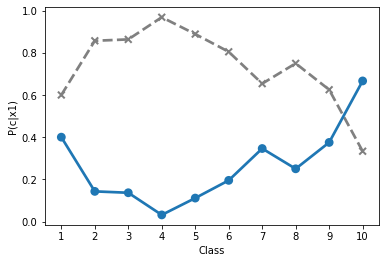

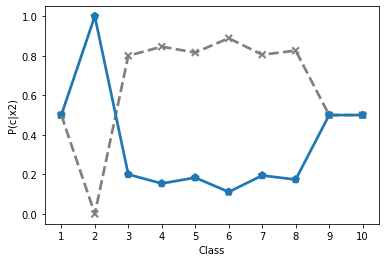

In [331]:
sns.pointplot(list(posterior_c1_x1.keys()),list(posterior_c1_x1.values()), linestyles="--",markers =['x'], color='grey' )
sns.pointplot(list(posterior_c2_x1.keys()),list(posterior_c2_x1.values()), linestyles="-",markers =['o'] )
#sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(c|x1)")
plt.show()
print('\n')
sns.pointplot(list(posterior_c1_x2.keys()),list(posterior_c1_x2.values()), linestyles="--",markers =['x'], color='grey'  )
sns.pointplot(list(posterior_c2_x2.keys()),list(posterior_c2_x2.values()), linestyles="-",markers =['p'] )
#sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(c|x2)")
plt.show()

Plot the histogram of C1

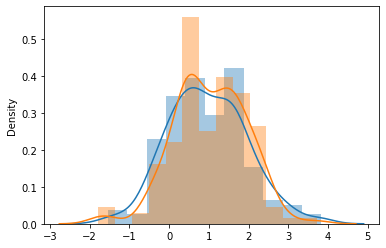

In [332]:
# Plot histogram for C1
sns.distplot(class1_train[:,0])
sns.distplot(class1_train[:,1])
plt.show()

Plot the histogram of C2

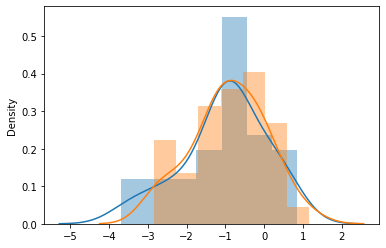

In [333]:
# Plot histogram for C2
sns.distplot(class2_train[:,0])
sns.distplot(class2_train[:,1])
plt.show()

# In the report please explain the plots that you are getting clearly explaining the reason .